Pour analyser les données d'Amazon on utilise les bibliothèques pandas, matplotlib et seaborn. Il convertit les dates, compte les films et les séries télévisées ajoutés chaque année, puis trace les tendances. Le graphique résultant offre des informations sur la croissance du contenu d'Amazon.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Ce code charge des données à partir d'un fichier CSV nommé 'amazon.csv' dans un DataFrame pandas appelé df. Il prépare le terrain pour l'analyse et la manipulation des données, facilitant des tâches telles que le filtrage, l'agrégation et la visualisation.

In [5]:
# Charger le dataset
df = pd.read_csv('amazon.csv')


Ce code extrait et compte les cinq catégories les plus fréquentes à partir de la colonne 'listed_in' du DataFrame df, puis les affiche. Il utilise la méthode str.split() pour diviser les chaînes de texte en listes, puis explode() pour les répartir en lignes individuelles, et enfin value_counts().nlargest(5) pour obtenir les cinq catégories les plus courantes.

In [6]:
# Top 5 des meilleures catégories
top_categories = df['listed_in'].str.split(',').explode().value_counts().nlargest(5)
print("Top 5 des meilleures catégories:\n", top_categories)


Top 5 des meilleures catégories:
 listed_in
Drama        2216
Action       1657
Comedy       1475
 Drama       1471
 Suspense    1307
Name: count, dtype: int64


Ce code extrait et compte les cinq réalisateurs les plus fréquents à partir de la colonne 'director' du DataFrame df, puis les affiche. Il utilise la méthode value_counts() pour compter les occurrences de chaque réalisateur, puis nlargest(5) pour sélectionner les cinq réalisateurs les plus courants.

In [7]:
# Top 5 des réalisateurs
top_directors = df['director'].value_counts().nlargest(5)
print("\nTop 5 des réalisateurs:\n", top_directors)



Top 5 des réalisateurs:
 director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


Ce code extrait et compte les dix acteurs les plus fréquents à partir de la colonne 'cast' du DataFrame df, puis les affiche. Il utilise la méthode str.split() pour diviser les chaînes de texte en listes, puis explode() pour les répartir en lignes individuelles, et enfin value_counts().nlargest(10) pour obtenir les dix acteurs les plus courants.

In [8]:
# Les dix meilleurs acteurs
top_actors = df['cast'].str.split(',').explode().value_counts().nlargest(10)
print("\nLes dix meilleurs acteurs:\n", top_actors)



Les dix meilleurs acteurs:
 cast
Maggie Binkley        56
1                     35
Gene Autry            32
 Nassar               30
 Champion             29
Anne-Marie Newland    25
 Prakash Raj          23
Roy Rogers            23
Cassandra Peterson    22
John Wayne            21
Name: count, dtype: int64


Ce code extrait les séries télévisées du DataFrame df, puis compte les cinq séries ayant le plus grand nombre de saisons en utilisant la colonne 'title'. Enfin, il affiche les résultats.

In [9]:
# Les cinq meilleures séries télévisées avec le plus grand nombre de saisons
tv_shows = df[df['type'] == 'TV Show']
top_tv_shows = tv_shows['title'].value_counts().nlargest(5)
print("\nLes cinq meilleures séries télévisées avec le plus grand nombre de saisons:\n", top_tv_shows)



Les cinq meilleures séries télévisées avec le plus grand nombre de saisons:
 title
Zoo Babies                           1
Brazilian Empire                     1
Strange Days at Blake Holsey High    1
Listening Snow Tower                 1
Paula's Best Dishes                  1
Name: count, dtype: int64


Ce code importe les modules TfidfVectorizer et cosine_similarity de la bibliothèque scikit-learn (sklearn) pour effectuer une analyse de similarité de texte basée sur la méthode TF-IDF (Term Frequency-Inverse Document Frequency) et la similarité cosinus.

In [11]:

# Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
# Nous pouvons utiliser la similarité cosinus pour comparer les descriptions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Ce code utilise le TfidfVectorizer de scikit-learn pour transformer les descriptions du DataFrame df en matrices TF-IDF, puis calcule la similarité cosinus entre ces matrices, fournissant une mesure de similarité entre les différentes descriptions.

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
cosine_sim = cosine_similarity(tfidf_matrix)


Cette fonction get_recommendations prend en entrée un titre de film ou de série télévisée et une matrice de similarité cosinus (par défaut, celle calculée précédemment). En utilisant l'indice du titre donné, elle récupère les scores de similarité associés à ce titre, les classe par ordre décroissant, sélectionne les cinq titres les plus similaires, puis retourne les titres correspondants à ces indices dans le DataFrame df.

In [13]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]


In [14]:
# Par exemple, pour trouver des films similaires à "The Grand Seduction"
print("\nFilms similaires à \"The Grand Seduction\":\n", get_recommendations("The Grand Seduction"))



Films similaires à "The Grand Seduction":
 5014    Mobutu's African Movie Theater: Episode 5
5203                                 Mango Dreams
4319                               Kadaram Kondan
1407                                 Oru Kai Osai
2638                        Doctor Blood's Coffin
Name: title, dtype: object


Ce code convertit la colonne 'date_added' du DataFrame df en format de date et l'assigne à une nouvelle colonne 'year_added', qui contient l'année d'ajout de chaque entrée.

In [27]:
# Amazon se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?
# Nous pouvons calculer le nombre de films et de séries télévisées ajoutées chaque année
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year


Ce code groupe les données du DataFrame df par année d'ajout et compte le nombre de films et de séries télévisées ajoutés chaque année, stockant les résultats dans les variables films_per_year et tv_shows_per_year, respectivement.

In [28]:
films_per_year = df[df['type'] == 'Movie'].groupby('year_added')['show_id'].count()
tv_shows_per_year = df[df['type'] == 'TV Show'].groupby('year_added')['show_id'].count()

Ce code crée une figure de taille 10x6 pouces et utilise seaborn pour tracer deux lignes représentant le nombre de films et de séries télévisées ajoutés chaque année. Les données sont extraites des variables films_per_year et tv_shows_per_year. Le titre, les étiquettes des axes et la légende sont ajoutés pour faciliter la compréhension, puis la visualisation est affichée.

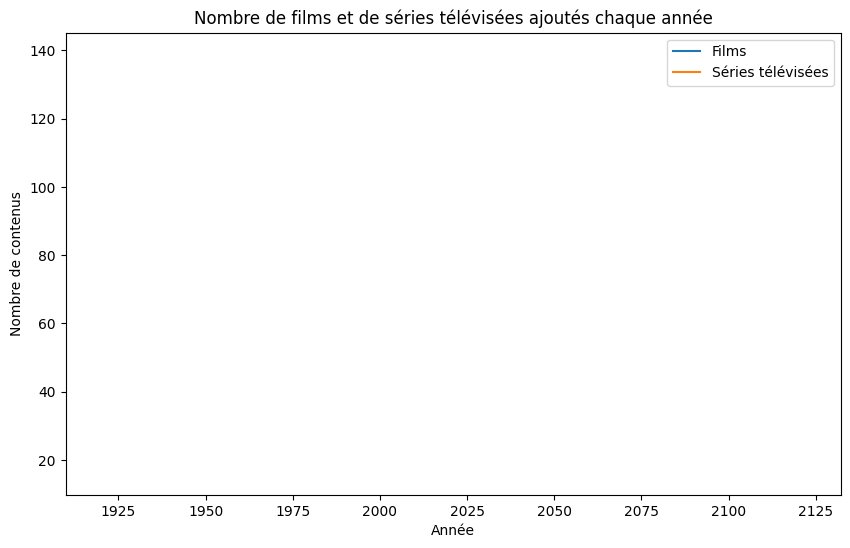

In [29]:
# Tracer les résultats
plt.figure(figsize=(10, 6))
sns.lineplot(x=films_per_year.index, y=films_per_year.values, label='Films')
sns.lineplot(x=tv_shows_per_year.index, y=tv_shows_per_year.values, label='Séries télévisées')

plt.title('Nombre de films et de séries télévisées ajoutés chaque année')
plt.xlabel('Année')
plt.ylabel('Nombre de contenus')
plt.legend()
plt.show()

Ce code groupe les données du DataFrame df par année de sortie et compte le nombre total de films et de séries télévisées pour chaque année, puis sélectionne les cinq années avec le plus grand nombre de sorties. Enfin, il affiche les résultats.

In [18]:
# Analyser les résultats du graphique
# En regardant le graphique, on peut conclure que ...

# Question 1 : Quelles sont les 5 meilleures années de sortie des films et des séries télévisées ?
top_release_years = df.groupby('release_year')['show_id'].count().nlargest(5)
print("\nTop 5 des meilleures années de sortie des films et des séries télévisées:\n", top_release_years)



Top 5 des meilleures années de sortie des films et des séries télévisées:
 release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
Name: show_id, dtype: int64


Ce code remplace les valeurs manquantes dans la colonne 'rating' par 'TV-NR', puis convertit les valeurs de cette colonne en codes catégoriels. Ensuite, il calcule la corrélation entre les colonnes 'rating' (note) et 'duration' (durée) des films du DataFrame df, et affiche la matrice de corrélation.

In [24]:
# Question 3 : Y a-t-il des corrélations entre la note (rating) et la durée des films ?
df['rating'] = df['rating'].fillna('TV-NR').astype('category').cat.codes
correlation = df[df['type'] == 'Movie'][['rating', 'duration']].corr()
print("\nCorrélation entre la note et la durée des films :")
print(correlation)



Corrélation entre la note et la durée des films :
            rating  duration
rating    1.000000 -0.028933
duration -0.028933  1.000000


Ce code crée un graphique de dispersion avec la durée des films en abscisse et leur note en ordonnée, en utilisant seaborn. Il affiche la relation entre la durée et la note des films du DataFrame df de type 'Movie'. Enfin, il ajoute un titre et des étiquettes d'axes au graphique, puis l'affiche.

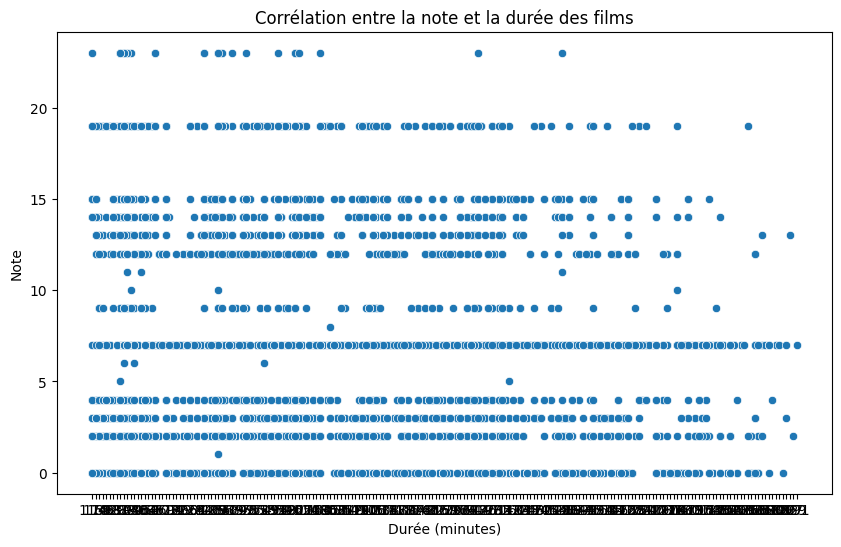

In [25]:
# Visualiser la corrélation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating', data=df[df['type'] == 'Movie'])
plt.title('Corrélation entre la note et la durée des films')
plt.xlabel('Durée (minutes)')
plt.ylabel('Note')
plt.show()